Clustering

1.Data Preprocessing:

In [3]:
import pandas as pd
import numpy as np
data=pd.read_excel(r"/content/sample_data/EastWestAirlines.xlsx") # Use read_excel for Excel files
data

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID


In [ ]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
data.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [ ]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [ ]:
data.duplicated().sum()

0

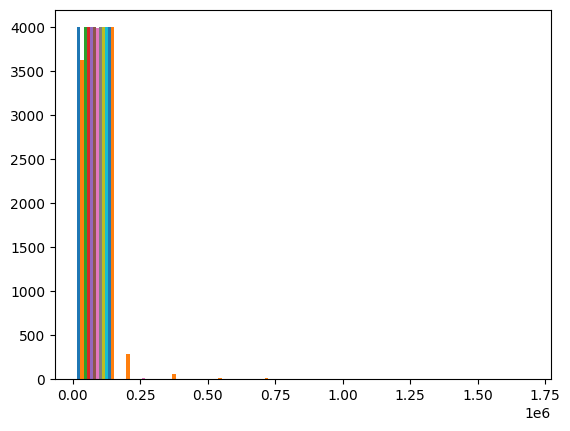

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data)
plt.show()

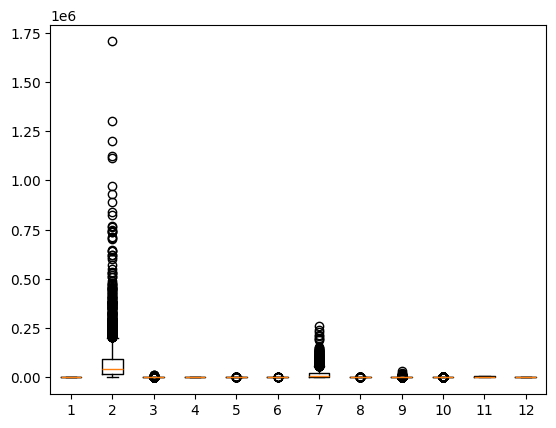

In [ ]:
plt.boxplot(data)
plt.show()

In [ ]:
correlation=data.corr()
correlation

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


<Axes: >

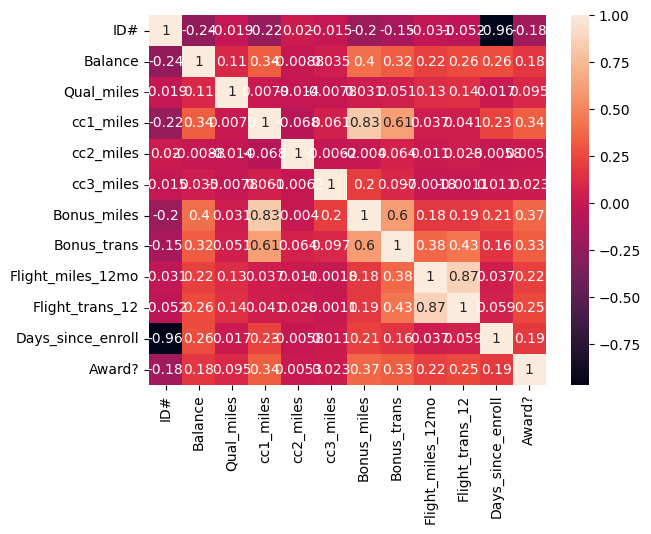

In [ ]:
import seaborn as sns
sns.heatmap(correlation,annot=True)

2.Implementing Clustering Algorithms:

K_mean_clustering algorithm

In [ ]:
from sklearn.cluster import KMeans
k=3 ## Assuming you have determined the optimal number of clusters (k)

In [ ]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

C:\Users\PRJAWAL\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
centroids = kmeans.cluster_centers_ #Print the centroids of the clusters
labels = kmeans.labels_ ## Get cluster labels for each data point
data['Cluster']=labels ## Add cluster labels to the original data

centroids,labels,data['Cluster']

(array([[2.14309645e+03, 3.88247222e+04, 1.04844742e+02, 1.81860610e+00,
         1.01555694e+00, 1.00746733e+00, 1.24181671e+04, 1.01104543e+01,
         3.22962352e+02, 9.68574984e-01, 3.87910174e+03, 3.33540759e-01],
        [9.18618182e+02, 6.47102218e+05, 5.23309091e+02, 3.16363636e+00,
         1.01818182e+00, 1.05454545e+00, 5.03299818e+04, 2.03090909e+01,
         1.63230909e+03, 5.70909091e+00, 6.27418182e+03, 7.81818182e-01],
        [1.53263973e+03, 1.83504699e+05, 2.88439726e+02, 3.03698630e+00,
         1.00958904e+00, 1.03013699e+00, 3.54549342e+04, 1.75123288e+01,
         9.75321918e+02, 2.83013699e+00, 5.01041918e+03, 5.01369863e-01]]),
 array([0, 0, 0, ..., 0, 0, 0]),
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 3994    0
 3995    0
 3996    0
 3997    0
 3998    0
 Name: Cluster, Length: 3999, dtype: int32)

4.Visualization:

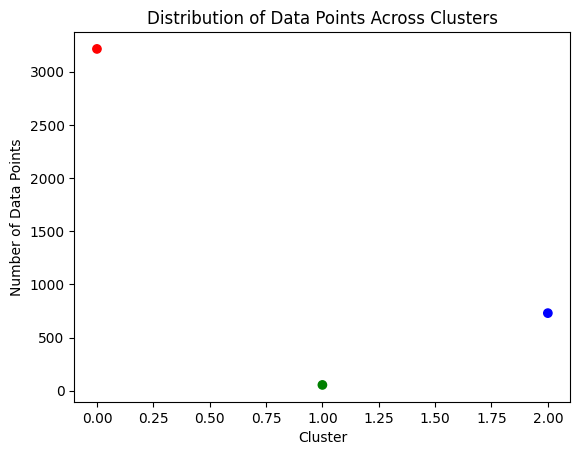

In [ ]:
cluster_counts = data['Cluster'].value_counts().sort_index()
color=['r','g','b']
plt.scatter(cluster_counts.index, cluster_counts.values,color=color)
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Across Clusters')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for K-Means
silhouette_kmeans = silhouette_score(data, kmeans.labels_)
print("Silhouette Score for K-Means:", silhouette_kmeans)


Silhouette Score for K-Means: 0.6450362378757606


DBSCAN algorithm

In [ ]:
from sklearn.cluster import DBSCAN

eps = 0.5  # epsilon, the maximum distance between two samples for them to be considered as in the same neighborhood
min_samples = 5  # minimum number of samples in a neighborhood for a point to be considered as a core point

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data)


DBSCAN()

In [ ]:
# Get cluster labels for each data point
labels = dbscan.labels_

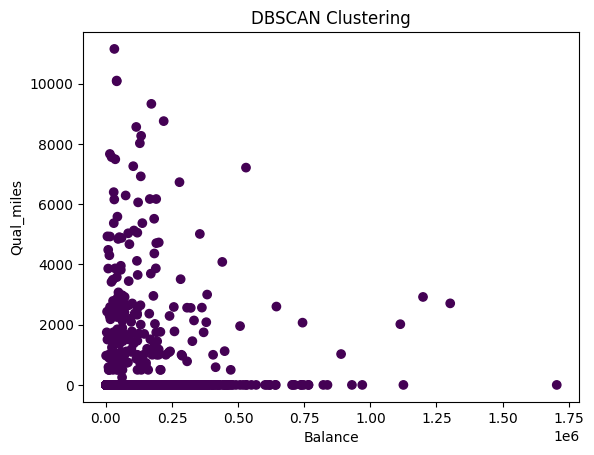

In [ ]:
import matplotlib.pyplot as plt

# Visualize clusters (2D example)
plt.scatter(data['Balance'], data['Qual_miles'], c=labels, cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.title('DBSCAN Clustering')
plt.show()


In [ ]:
x=data.iloc[:,[2,3]]
x

,Qual_miles,cc1_miles
0,0,1
1,0,1
2,0,1
3,0,1
4,0,4
...,...,...
3994,0,1
3995,0,1
3996,0,3
3997,0,1


In [ ]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')
db

DBSCAN(eps=3, min_samples=4)

In [ ]:
model=db.fit(x)

In [ ]:
label=model.labels_
label

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
from sklearn import metrics
import numpy as np
#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))-(1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 6


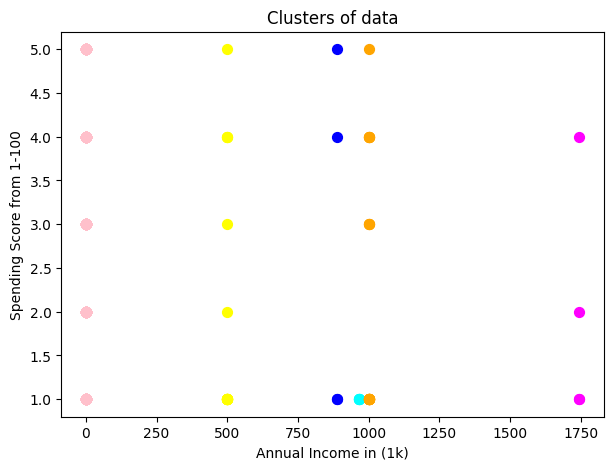

In [ ]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x.iloc[y_means == 0, 0], x.iloc[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x.iloc[y_means == 1, 0], x.iloc[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x.iloc[y_means == 2, 0], x.iloc[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x.iloc[y_means == 3, 0], x.iloc[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x.iloc[y_means == 4, 0], x.iloc[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x.iloc[y_means == 5, 0], x.iloc[y_means == 5, 1], s = 50, c = 'blue')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()

In [ ]:
# Calculate silhouette score for DBSCAN
from sklearn.metrics import silhouette_score
silhouette_dbscan = silhouette_score(data, db.labels_)
print("Silhouette Score for DBSCAN:", silhouette_dbscan)


Silhouette Score for DBSCAN: -0.23854640603251967


hierarchical clustering

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
         1.39545434e+00, -7.66919299e-01, -4.88918314e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
         1.37995704e+00, -7.66919299e-01, -4.88918314e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
         1.41192021e+00, -7.66919299e-01, -4.88918314e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -4.88918314e-01],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -4.88918314e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -4.88918314e-01]])

In [ ]:
# Perform hierarchical clustering
# You can adjust parameters like linkage method and number of clusters as needed
model = AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters = model.fit_predict(scaled_data)

In [ ]:
# Add cluster labels to the original dataset
data['cluster'] = clusters

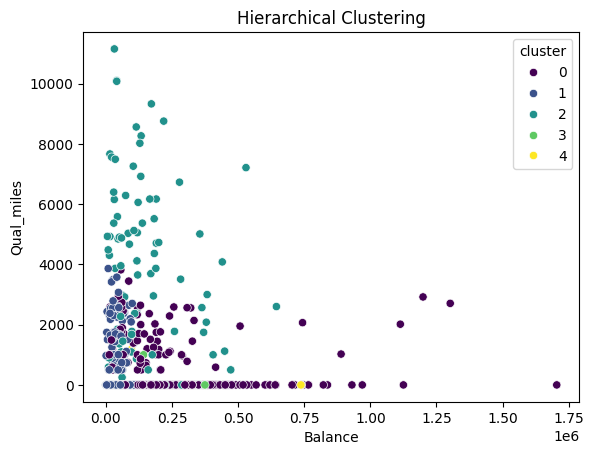

In [ ]:
sns.scatterplot(data=data, x='Balance', y='Qual_miles', hue='cluster', palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.show()